# Functions

## What are functions?

Functions are reusable blocks of code that perform a specific task. They help streamline your code by allowing you to avoid repetition, improve readability, and make maintenance easier.

The general syntax for defining a function is the following:

```python
def function_name(parameter_1, ..., parameter_n):
    """Docstring"""
    <body of the function>
    return value  # Depending on the function
```

In [31]:
# Example 1: one-line docstring, no parameters, no return value
def greet():
    """Print a greeting message."""
    print("Hello, welcome to the class!")

In [32]:
# Example 2: multi-line docstring, parameters, and return value
def calculate_area(radius):
    """
    Calculate the area of a circle given its radius.

    #Argument
    Args:
        radius (float): The radius of the circle.

    #function returns   
    Returns:
        float: The area of the circle, calculated as π * radius^2.
    """
    area = 3.14159 * radius ** 2
    return area

In [33]:
for radius in [1,2,3]:
    area = calculate_area(radius)
    print(f"The area of a circle with radius {radius} is {area:.2f}")

The area of a circle with radius 1 is 3.14
The area of a circle with radius 2 is 12.57
The area of a circle with radius 3 is 28.27


## Data loading and preparation

We'll practice creating functions using the same datasets from last week.

In [34]:
import os
import pandas as pd

import geopandas as gpd
import matplotlib.pyplot as plt

# Display all columns when looking at dataframes
pd.set_option("display.max.columns", None)

# --------------------------------------------------
# Import power plants data
URL = 'https://raw.githubusercontent.com/carmengg/eds-220-book/refs/heads/main/data/power_plants_epsg4269.csv'
power_plants = pd.read_csv(URL)
power_plants = power_plants.drop(columns='Unnamed: 0') # Drop first column

# Import states data
fp = os.path.join('data','tl_2022_us_state','tl_2022_us_state.shp')
states = gpd.read_file(fp)
states.columns = states.columns.str.lower()

# --------------------------------------------------
# Create geometry column for power plants
points = gpd.points_from_xy(power_plants.longitude,
                            power_plants.latitude)

# Convert power plants DataFrame to GeoDataFrame
power_plants = gpd.GeoDataFrame(power_plants,      # Data
                                geometry=points,   # Specify geometry column
                                crs='EPSG:4269'    # Specify CRS
                                )


## Exercise: CA top power plant sources map

Last week we solved the followinge exercise to use a `for` with a `zip` to create subplots of the top 3 power plant sources in California.

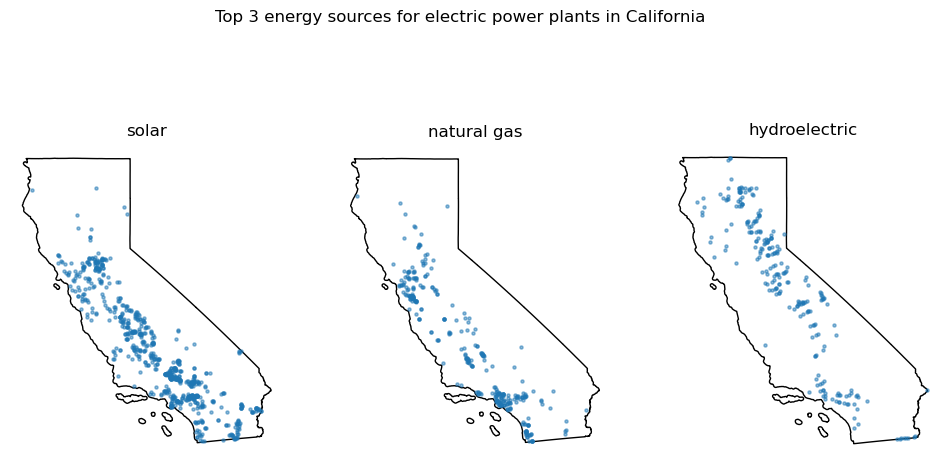

In [35]:
# Select CA power plants and boundary
ca_power_plants = power_plants[power_plants['state'] == 'California']
ca_boundary = states[states['name'] == 'California']

# CA top 3 power sources were previously given
ca_top_sources = ['solar', 'natural gas', 'hydroelectric'] # HARD CODING

# Create subplots for each top source in a single figure
fig, ax = plt.subplots(figsize=(12,6), nrows=1, ncols=3)
for axis, source in zip(ax, ca_top_sources):   # Iterate over subplots and energy sources

    axis.set_title(source)
    axis.axis('off')

    ca_boundary.plot(ax=axis,
                     color='none')
    
    # Subset power plants by source and plot
    source_subset = ca_power_plants[ca_power_plants['primsource'] == source]
    source_subset.plot(ax=axis,
                    markersize=5,
                    alpha=0.5)

plt.suptitle(f"Top 3 energy sources for electric power plants in California")    
plt.show()

## Steps to create a function

Recommended Steps for writing a function:
1. Solve the problem for a specific example.
2. Identify which parts of the code need to be generalized and update these parts
3. Wrap this into a function
4. Add additional parameters or assert statements
5. Test function
6. Add a docstring

Example:
- We want to obtain the top 3 power sources for any state programatically as a function

### Step 1: Solve for a specific example

Example: solve this for CA


In [36]:
# Subsetting for only California
state_power_plants = power_plants[power_plants['state'] == 'California']

#
top_sources = (state_power_plants['primsource']
               # counts of values
               .value_counts()
               # Index top 3
               .index[:3]
               # grab top three as a list
               .tolist())
top_sources


['solar', 'natural gas', 'hydroelectric']

## Step 2: Indetify parts of the code that need to be generalized

In [37]:
state = 'California'
# Subsetting for only California
state_power_plants = power_plants[power_plants['state'] == state]

#
top_sources = (state_power_plants['primsource']
               # counts of values
               .value_counts()
               # Index top 3
               .index[:3]
               # grab top three as a list
               .tolist())
top_sources

['solar', 'natural gas', 'hydroelectric']

## Step 3: Define the function
and
## Step 4: Adjust Parameters

In [38]:
# from previous code
def top3_sources(state, power_plants):
# Subsetting for only California
    state_power_plants = power_plants[power_plants['state'] == state]

    #
    top_sources = (state_power_plants['primsource']
                # counts of values
                .value_counts()
                # Index top 3
                .index[:3]
                # grab top three as a list
                .tolist())
    return(top_sources)

In [39]:
# Testing with other states
top3_sources('Texas',power_plants)

['natural gas', 'wind', 'solar']

## Example:

Create a function that will produce a plot given a list of primary sources and state name. 
(Recreate the previous plot for any **state**)

## Step 1: Solve an example

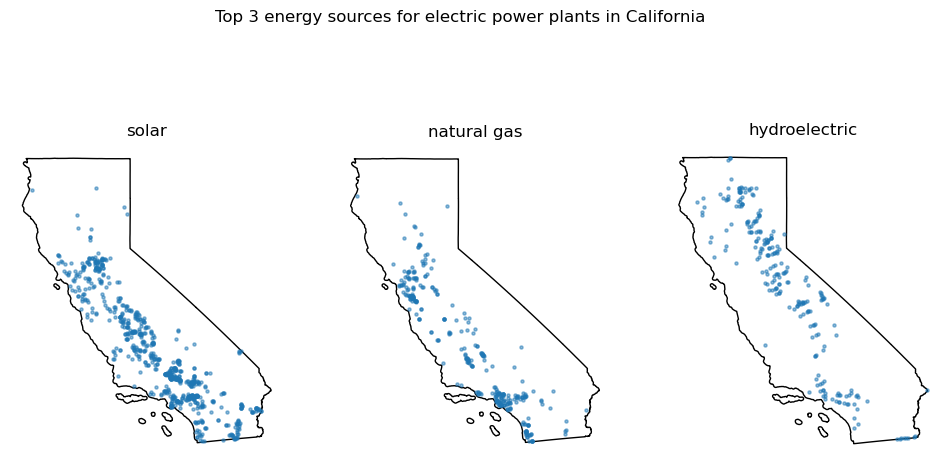

In [40]:
# Select CA power plants and boundary
ca_power_plants = power_plants[power_plants['state'] == 'California']
ca_boundary = states[states['name'] == 'California']

# CA top 3 power sources were previously given
ca_top_sources = top3_sources('California', power_plants)

# Create subplots for each top source in a single figure
fig, ax = plt.subplots(figsize=(12,6), nrows=1, ncols=3)
for axis, source in zip(ax, ca_top_sources):   # Iterate over subplots and energy sources

    axis.set_title(source)
    axis.axis('off')

    ca_boundary.plot(ax=axis,
                     color='none')
    
    # Subset power plants by source and plot
    source_subset = ca_power_plants[ca_power_plants['primsource'] == source]
    source_subset.plot(ax=axis,
                    markersize=5,
                    alpha=0.5)

plt.suptitle(f"Top 3 energy sources for electric power plants in California")    
plt.show()

## Step 2: Which part of the code need to be generalized

Anything where **CA** is used specifically

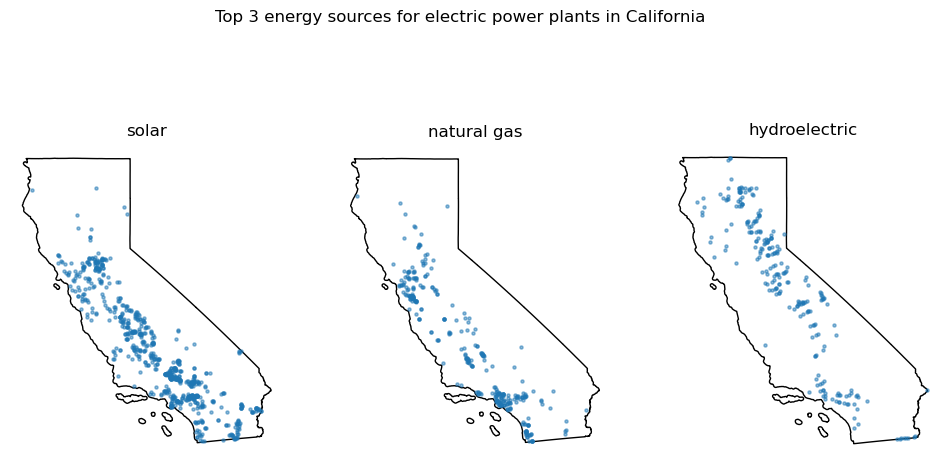

In [49]:
state = 'California'

# Select State power plants and boundary
state_power_plants = power_plants[power_plants['state'] == state]
state_boundary = states[states['name'] == state]

# State top 3 power sources were previously given
state_top_sources = top3_sources(state, power_plants)

# Create subplots for each top source in a single figure
fig, ax = plt.subplots(figsize=(12,6), nrows=1, ncols=3)
for axis, source in zip(ax, state_top_sources):   # Iterate over subplots and energy sources

    axis.set_title(source)
    axis.axis('off')

    state_boundary.plot(ax=axis,
                     color='none')
    
    # Subset power plants by source and plot
    source_subset = state_power_plants[state_power_plants['primsource'] == source]
    source_subset.plot(ax=axis,
                    markersize=5,
                    alpha=0.5)

plt.suptitle(f"Top 3 energy sources for electric power plants in {state}")    
plt.show()

## Step 3: Wrap everything into a function

In [62]:
def plot_top3_power_soources(state, power_plants, states):
    # Select state power plants and boundary
    state_power_plants = power_plants[power_plants['state'] == state]
    state_boundary = states[states['name'] == state]
    # State top 3 power sources were previously given
    state_top_sources = top3_sources(state, power_plants)
    # Create subplots for each top source in a single figure
    fig, ax = plt.subplots(figsize=(12,6), nrows=1, ncols=3)
    for axis, source in zip(ax, state_top_sources):   # Iterate over subplots and energy sources
        axis.set_title(source)
        axis.axis('off')
        state_boundary.plot(ax=axis,
                        color='none')
    # Subset power plants by source and plot
        source_subset = state_power_plants[state_power_plants['primsource'] == source]
        source_subset.plot(ax=axis,
                        markersize=5,
                        alpha=0.5)
    plt.suptitle(f"Top 3 energy sources for electric power plants in {state}")
    plt.show()

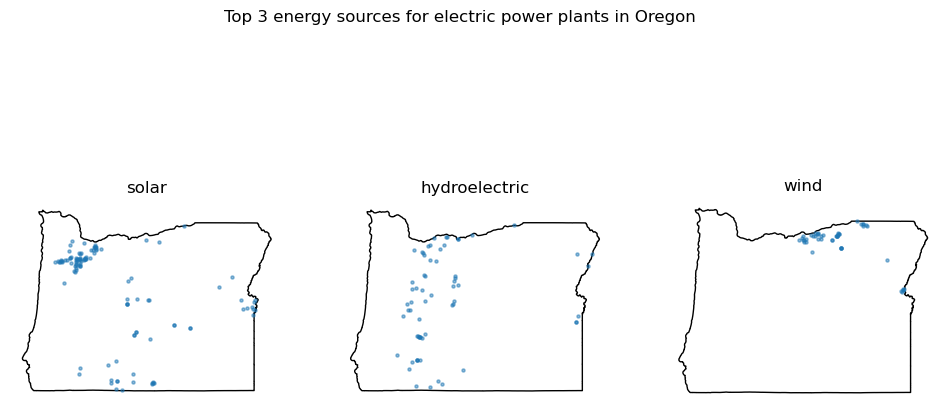

In [63]:
plot_top3_power_soources('Oregon', power_plants, states)

# Exercise 1: 

Create a function called power_source_counts that, given a power source, returns a Series with the counts of power plants by state that use that source.

Follow the steps:

solve the problem for a specific example (e.g., ‘wind’)
identify which parts of the code need to be generalized and update these parts
wrap this into a function
add additional parameters or assert statements if needed

In [ ]:
# step 1:
top_states = power_plants[power_plants.primsource == 'wind'].state.value_counts() # hard-coding 'wind'
top_states

state
Texas             215
Minnesota         122
Iowa              121
California        107
Oklahoma           64
Illinois           50
Oregon             49
Kansas             47
North Dakota       39
Nebraska           34
Michigan           34
Colorado           32
New York           32
Idaho              32
New Mexico         29
Pennsylvania       26
Wyoming            25
South Dakota       23
Washington         23
Ohio               22
Massachusetts      20
Indiana            20
Maine              20
Rhode Island       19
Montana            19
Missouri           14
Wisconsin          12
Hawaii              8
West Virginia       8
Arizona             6
New Hampshire       5
Utah                5
Maryland            5
Vermont             5
Alaska              4
Tennessee           2
New Jersey          2
Puerto Rico         2
Delaware            1
Nevada              1
Virginia            1
North Carolina      1
Connecticut         1
Name: count, dtype: int64

In [89]:
# step 2: Identify what needs to be generalize
# 1. Remove Hard-Coding
source = 'wind'
top_states = power_plants[power_plants.primsource == source].state.value_counts()
top_states

state
Texas             215
Minnesota         122
Iowa              121
California        107
Oklahoma           64
Illinois           50
Oregon             49
Kansas             47
North Dakota       39
Nebraska           34
Michigan           34
Colorado           32
New York           32
Idaho              32
New Mexico         29
Pennsylvania       26
Wyoming            25
South Dakota       23
Washington         23
Ohio               22
Massachusetts      20
Indiana            20
Maine              20
Rhode Island       19
Montana            19
Missouri           14
Wisconsin          12
Hawaii              8
West Virginia       8
Arizona             6
New Hampshire       5
Utah                5
Maryland            5
Vermont             5
Alaska              4
Tennessee           2
New Jersey          2
Puerto Rico         2
Delaware            1
Nevada              1
Virginia            1
North Carolina      1
Connecticut         1
Name: count, dtype: int64

In [95]:
# step 3 AND 4: Wrap this into a function. ADD PARAMETERS

# start function
def power_source_output(source, power_plants):
    #source = 'wind' DELETE THIS / COMMENT OUT
    top_states = power_plants[power_plants.primsource == source].state.value_counts()
    return(top_states)

# Can change wind to something else like: 'nuclear','solar', etc.
power_source_output('nuclear',power_plants)

state
Illinois          6
South Carolina    4
Pennsylvania      4
New York          3
North Carolina    3
New Jersey        2
Texas             2
Louisiana         2
Virginia          2
Alabama           2
Minnesota         2
Michigan          2
Georgia           2
Florida           2
Tennessee         2
Ohio              2
California        1
Missouri          1
New Hampshire     1
Nebraska          1
Wisconsin         1
Mississippi       1
Maryland          1
Arizona           1
Connecticut       1
Washington        1
Kansas            1
Arkansas          1
Name: count, dtype: int64